# Fekundita v čase

# Knihovny

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from typing import Tuple
from datetime import datetime

# Získání dat

In [2]:
porodnost_odkaz = "https://www.czso.cz/documents/10180/142756312/13007021g04.xlsx/61d71ed7-d4b5-4dce-8fb8-6b558ca8eec5?version=1.1"
porodnost_df = pd.read_excel(porodnost_odkaz, sheet_name = "data")
porodnost_df

,Rok /\nYear,Unnamed: 1,Živě narození / Live births,Živě narození mimo manželství / Live births outside marriage,Podíl živě narozených mimo manželství (%) / Proportion of live births outside marriage (%)
0,1805,NaN,NaN,NaN,NaN
1,1806,NaN,170277.0,8837.0,5.189779
2,1807,NaN,220530.0,NaN,NaN
3,1808,NaN,221952.0,NaN,NaN
4,1809,NaN,211573.0,NaN,NaN
...,...,...,...,...,...
219,V období 1788–1855 údaje za tzv. vojenský nebo...,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN
221,Notes:,NaN,NaN,NaN,NaN
222,"In 1785–1899 the territory of Bohemia, Moravia...",NaN,NaN,NaN,NaN


# Mezizpracování dat

In [3]:
data_porodnost = porodnost_df[["Rok /\nYear", "Živě narození / Live births"]].dropna()
od_roku = 0
data_porodnost = data_porodnost[data_porodnost["Rok /\nYear"] >= od_roku]
data_porodnost

,Rok /\nYear,Živě narození / Live births
1,1806,170277.0
2,1807,220530.0
3,1808,221952.0
4,1809,211573.0
5,1810,198407.0
...,...,...
211,2016,112663.0
212,2017,114405.0
213,2018,114036.0
214,2019,112231.0


# Vykreslení

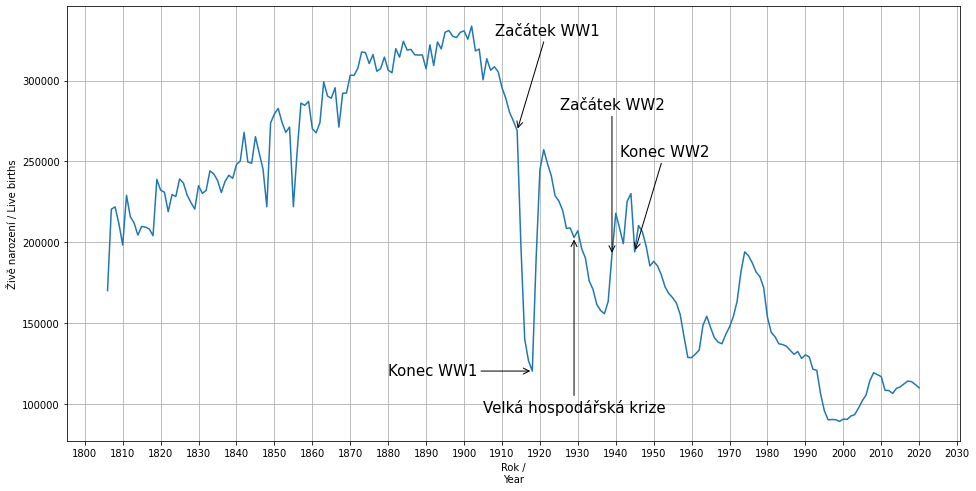

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(data=data_porodnost, x="Rok /\nYear", y="Živě narození / Live births", ax=ax)

def annotate_years(annotations: Tuple[int,str, Tuple[int, int]], df_x_name, df_y_name, ax, df):
    for year, text, xy_move in annotations:
        x = year
        y = df.loc[(df[df_x_name] == year)][df_y_name]
        ax.annotate(text,
            xy=(x, y),
            xycoords='data',
            xytext=xy_move,
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            va='center',
            fontsize=15)

        
annotate_years([
    (1914, "Začátek WW1", (30,100)),
    (1918, "Konec WW1",(-100,0)),
    (1939, "Začátek WW2", (0,150)),
    (1945, "Konec WW2", (30,100)),
    (1929, "Velká hospodářská krize", (0, -170)),    ],
    "Rok /\nYear", "Živě narození / Live births", ax, data_porodnost)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', rotation=0)
plt.grid()
plt.savefig('porodnost_v_case.png')